# San Francisco Crime Data 2016

In [1]:
#import functions

#manipulation and visualization libraries
import numpy as np
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

#GIS Libraries
%matplotlib inline

In [2]:
#import data

# download the data
CRIME = pd.read_csv(r"https://raw.githubusercontent.com/eduardogch/KSU-Practical-Data-Analytics/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [3]:
print (CRIME.head())

   IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek            Date   Time  PdDistrict      Resolution  \
0    Friday  1/29/2016 0:00  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  1/29/2016 0:00  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  4/25/2016 0:00  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday   1/5/2016 0:00  23:50  TENDERLOIN            NONE   
4    Friday   1/1/2016 0:00   0:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT S

In [4]:
#drop NA and duplicate values
CRIME.dropna(inplace = True)
CRIME.drop_duplicates(inplace = True)
CRIME.isna().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [5]:
#convert date/time

CRIME['Date'] = pd.to_datetime(CRIME['Date'])

CRIME['Time'] = pd.to_datetime(CRIME['Time'])

CRIME['Hour'] = CRIME['Time'].dt.hour

In [6]:
# view updated columns

print('Columns :',CRIME.columns)
print('Indexes :',CRIME.index)

print('Column types :',CRIME.dtypes)

Columns : Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Hour'],
      dtype='object')
Indexes : Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            150490, 150491, 150492, 150493, 150494, 150495, 150496, 150497,
            150498, 150499],
           dtype='int64', length=150485)
Column types : IncidntNum             int64
Category              object
Descript              object
DayOfWeek             object
Date          datetime64[ns]
Time          datetime64[ns]
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Location              object
PdId                 float64
Hour                   int64
dtype: object


In [7]:
# print the different categories - this is our target attribute

print('Categories :',CRIME.Category.unique())

Categories : ['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'OTHER OFFENSES'
 'MISSING PERSON' 'LARCENY/THEFT' 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY'
 'FRAUD' 'DRUG/NARCOTIC' 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM'
 'ARSON' 'PROSTITUTION' 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS'
 'TRESPASS' 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE'
 'RUNAWAY' 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']


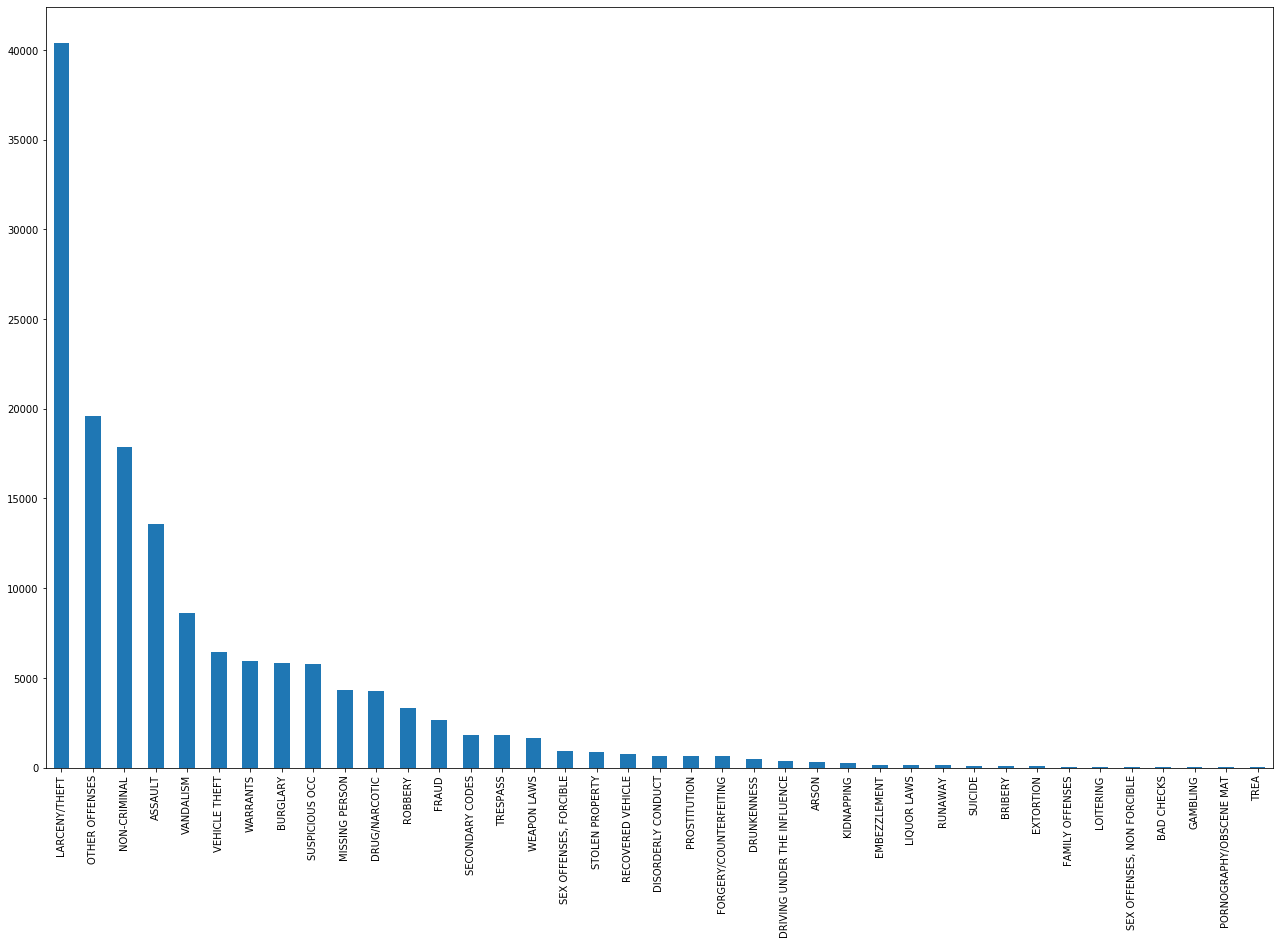

LARCENY/THEFT                  40395
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3298
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [9]:
# Visualize number of crimes per category

pd.value_counts(CRIME['Category']).plot(kind="bar", figsize = (22, 14))
plt.show()
print(CRIME['Category'].value_counts())

In [10]:
## Group dataset by crime occurences and hour of occurance - feature of model

crime_per_time = CRIME["Hour"].value_counts().sort_index()
crime_per_time

0     6940
1     4359
2     3494
3     2553
4     1885
5     1744
6     2518
7     3894
8     5575
9     5863
10    6482
11    6784
12    9021
13    7267
14    7621
15    8328
16    8655
17    9559
18    9717
19    8979
20    8097
21    7480
22    7099
23    6571
Name: Hour, dtype: int64

In [11]:
#function to find the count of unique items in a specified column
def unique_count(col_name):
    unique, counts = np.unique(col_name, return_counts=True)
    return dict(zip(unique, counts))

#get districts in order to make the department key the same across graphs
district_list = CRIME.PdDistrict.unique()

In [12]:
#get count for crimes per day of the week - possible feature

unique_count(CRIME.DayOfWeek)

{'Friday': 23370,
 'Monday': 20779,
 'Saturday': 22170,
 'Sunday': 20203,
 'Thursday': 21393,
 'Tuesday': 21241,
 'Wednesday': 21329}

Text(0.5, 1.0, 'Crime by Day of the Week')

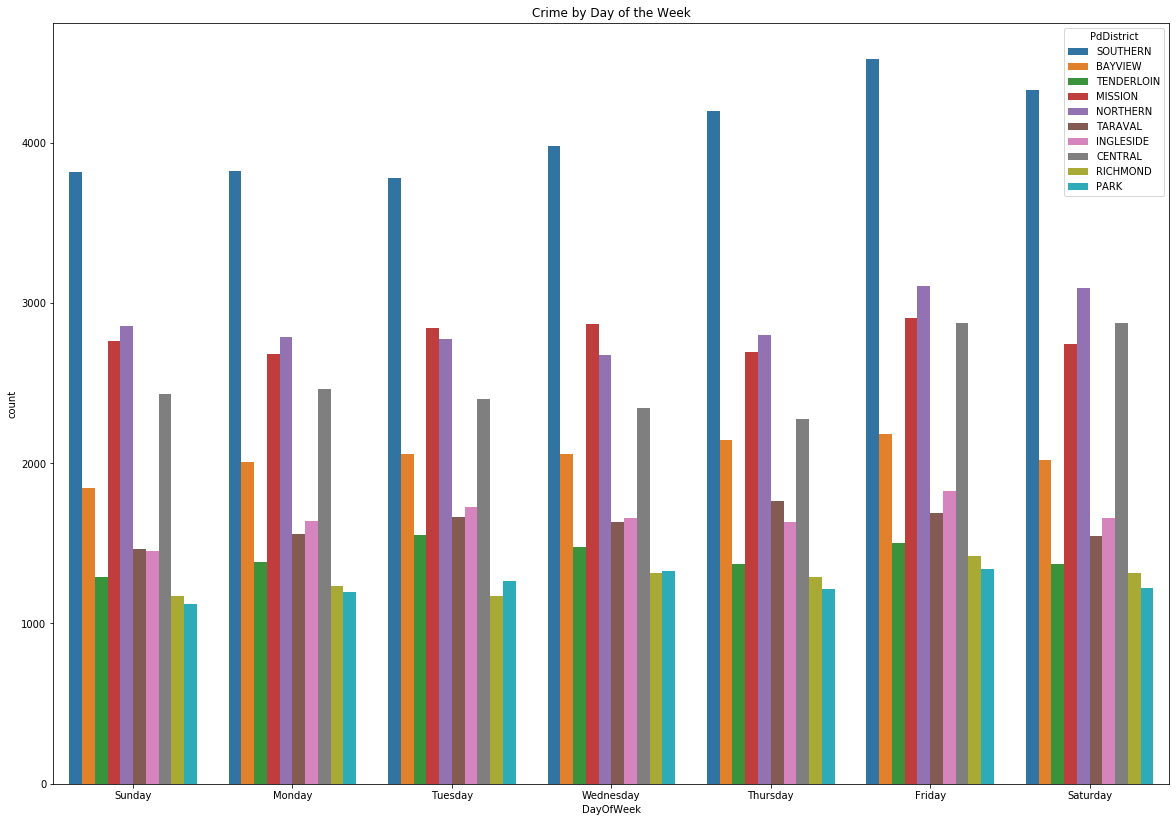

In [13]:
#force the order of days in a graph
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#visualize relationship between number of crimes committed by day of week and PdDistrict 
plt.figure(figsize=(20,14))
ax = sns.countplot(x="DayOfWeek",
                   hue = 'PdDistrict',
                   data=CRIME,
                   order=days,
                  hue_order=district_list)

plt.title('Crime by Day of the Week')

In [14]:
#Cross tabulation of DayOfWeek and Category columns
cross_days_and_cat = pd.crosstab(index=CRIME['DayOfWeek'], columns=CRIME['Category'])

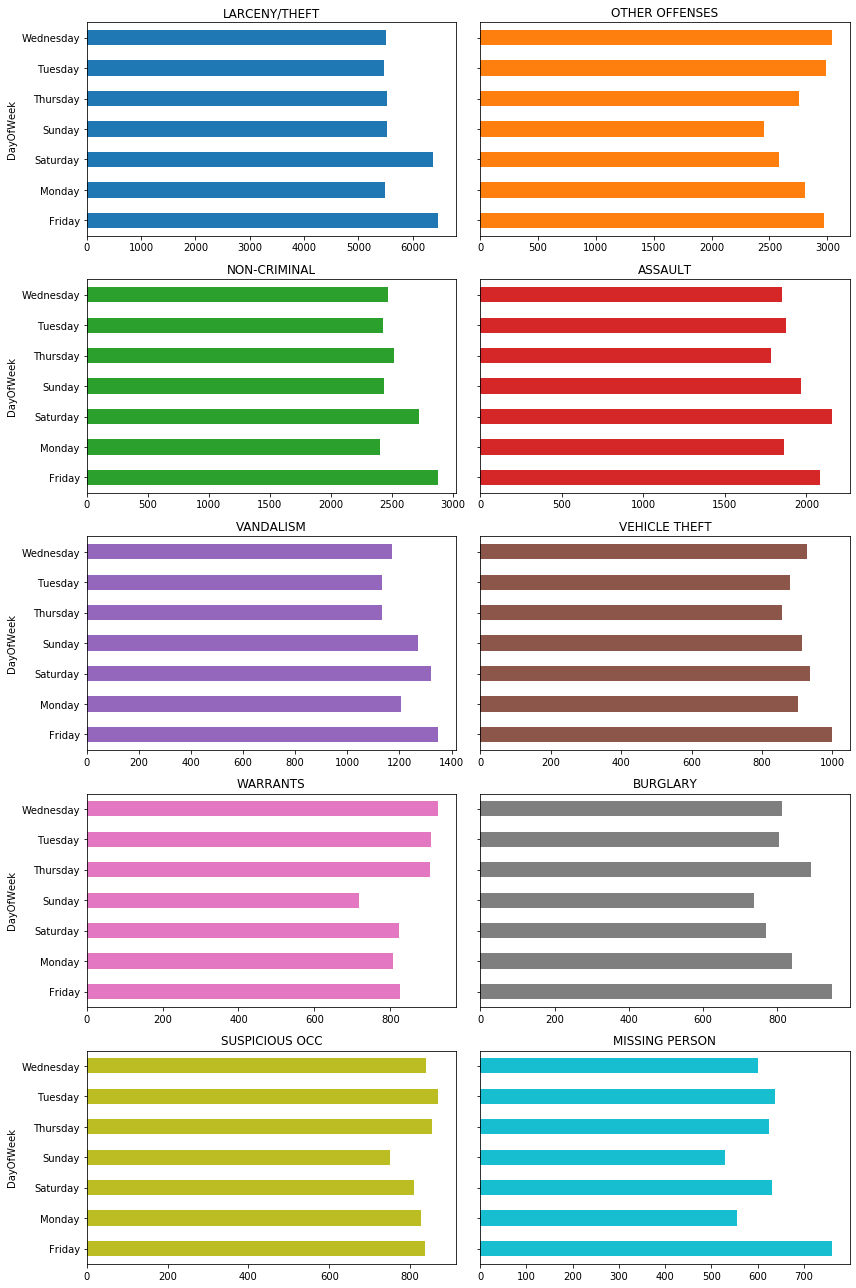

In [15]:
#Plot of 10 most committed crimes, each with the days of the week.
cross_days_and_cat.loc[:,cross_days_and_cat.sum(axis=0).nlargest(10).index].plot.barh(subplots=True, sharey=True,
                                                        sharex=False, layout=(5,2), figsize=(12,18), legend=False)
plt.tight_layout()

In [16]:
#Cross tabulation of PdDistrict and Category columns
cross_pd_and_cat = pd.crosstab(index=CRIME['PdDistrict'], columns=CRIME['Category'])

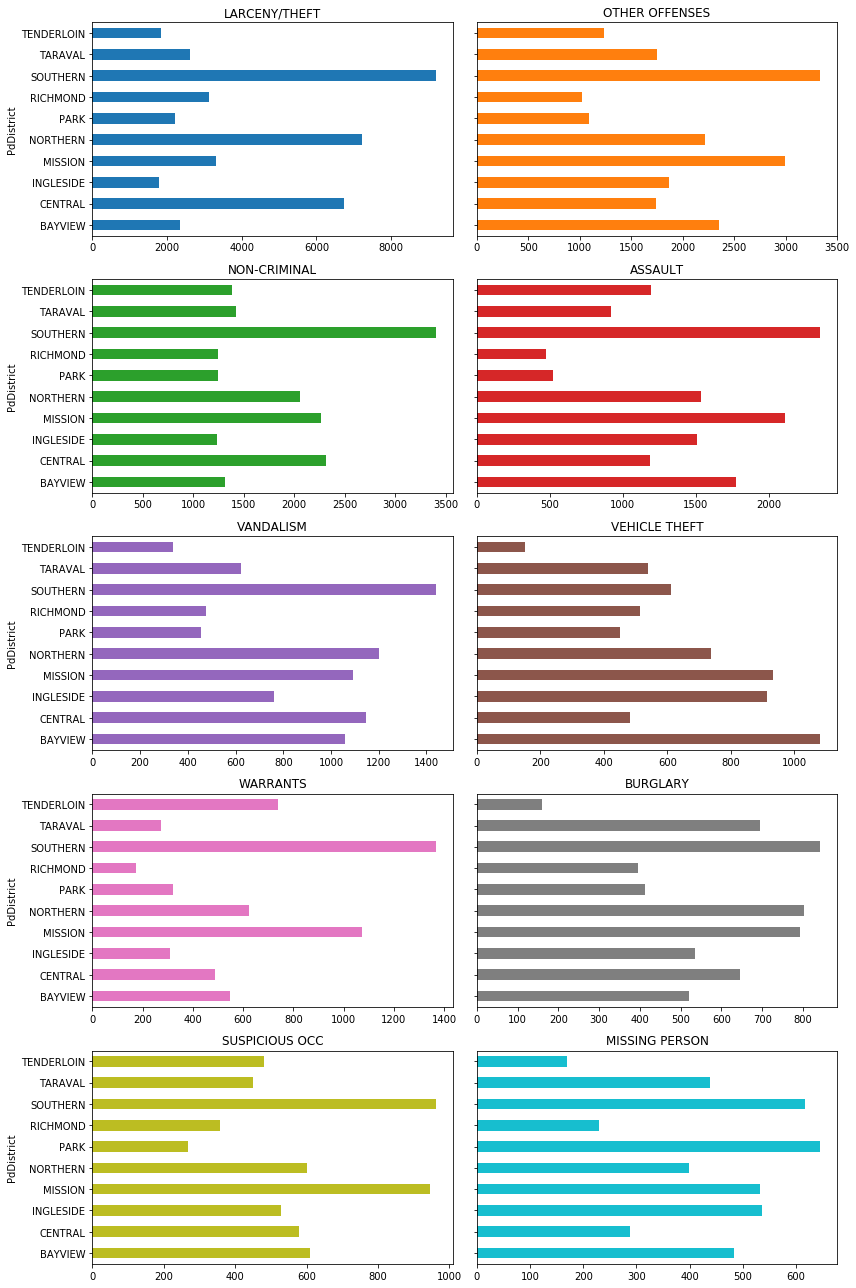

In [17]:
#Plot of PdDistrict and Crime
cross_pd_and_cat.loc[:,cross_days_and_cat.sum(axis=0).nlargest(10).index].plot.barh(subplots=True, sharey=True,
                                                        sharex=False, layout=(5,2), figsize=(12,18), legend=False)
plt.tight_layout()

In [18]:
#Cross tabulation of hour and Category columns
cross_pd_and_cat = pd.crosstab(index=CRIME['Hour'], columns=CRIME['Category'])

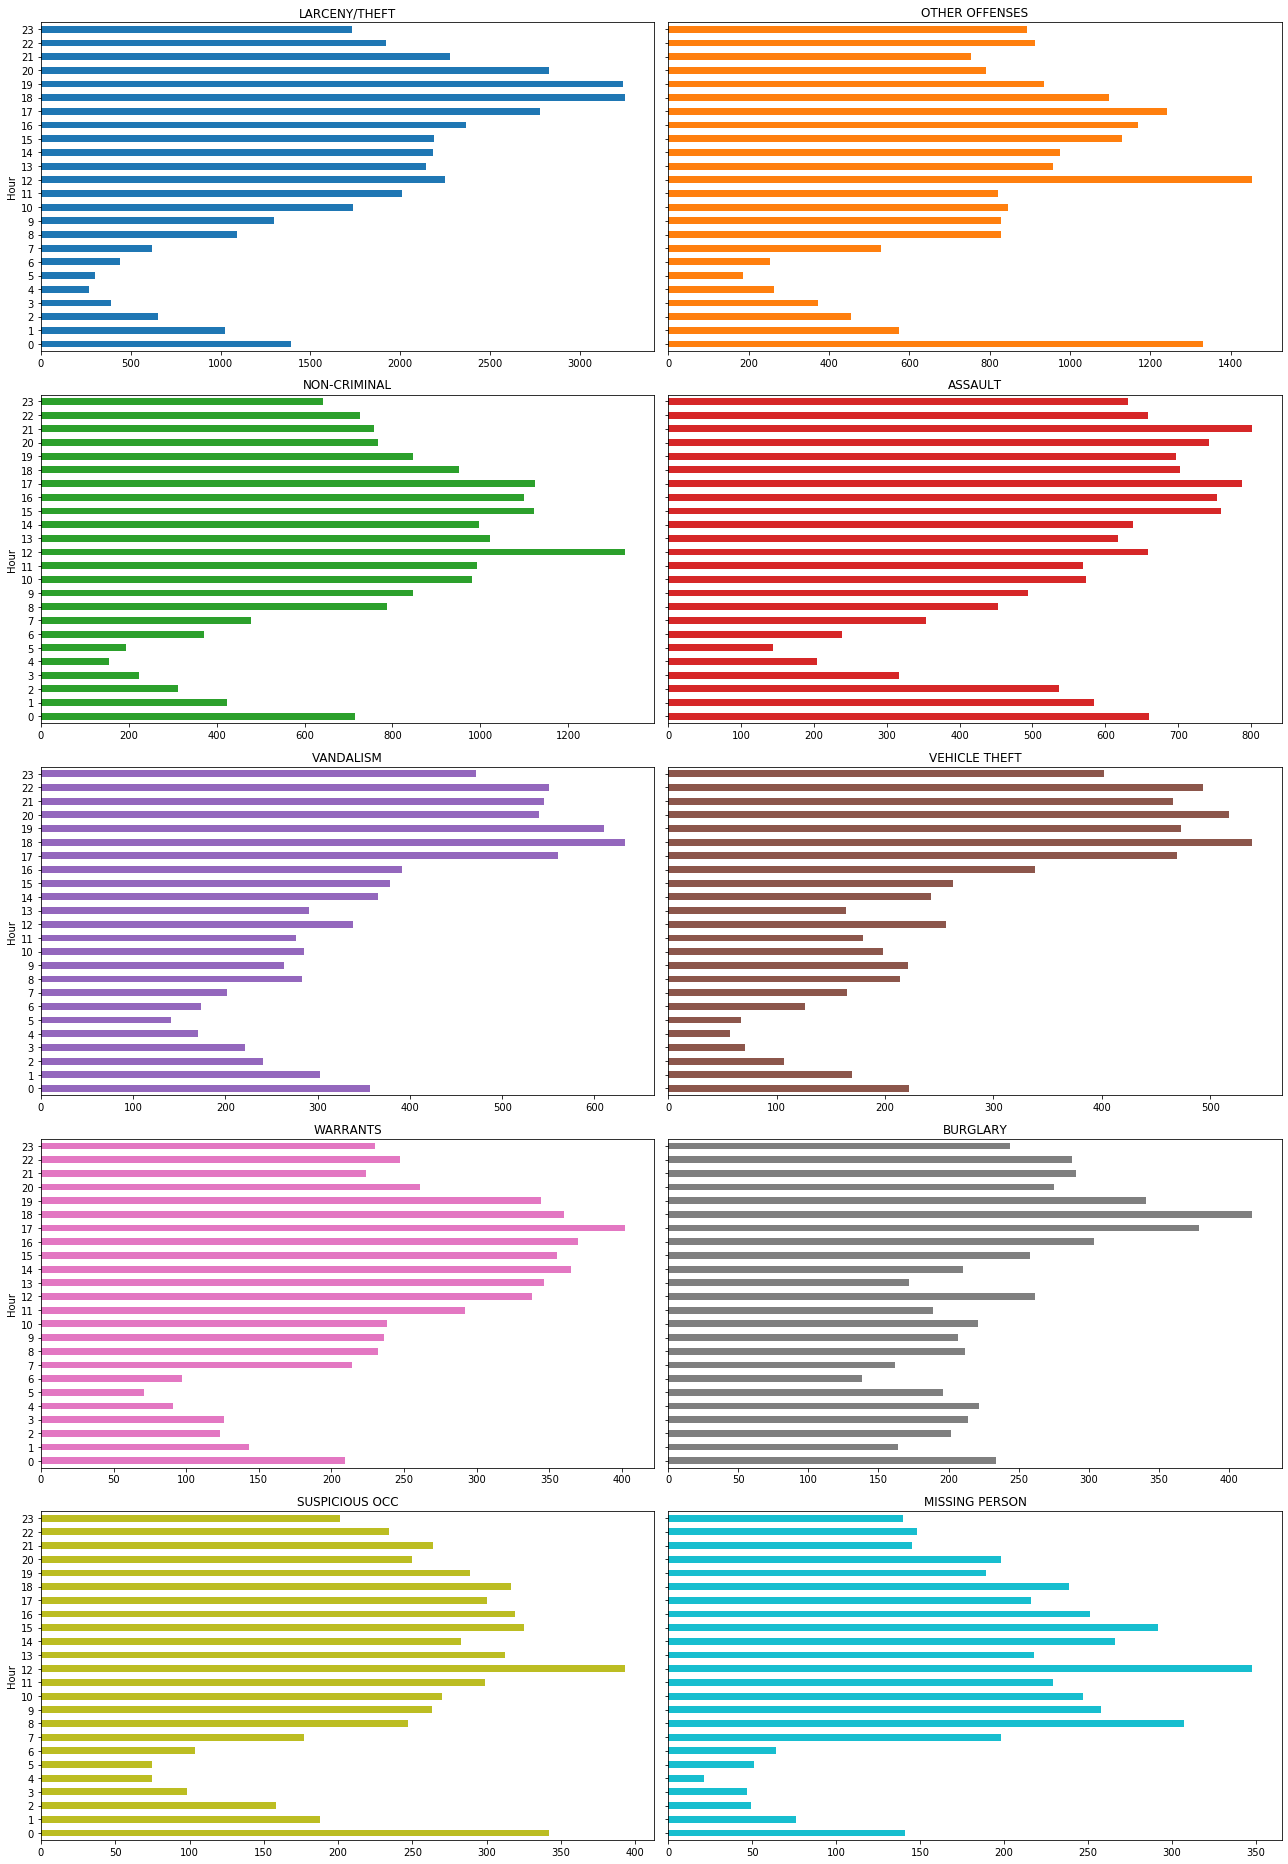

In [19]:
#Plot of 10 most committed crimes, each hour.
cross_pd_and_cat.loc[:,cross_days_and_cat.sum(axis=0).nlargest(10).index].plot.barh(subplots=True, sharey=True,
                                                        sharex=False, layout=(5,2), figsize=(18,26), legend=False)
plt.tight_layout()

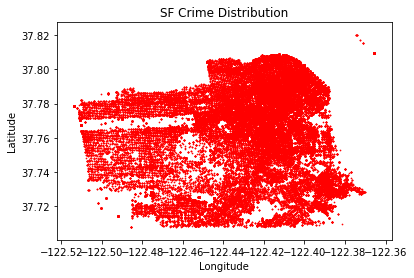

In [20]:
#visualize distribution of crime based on location - possible feature

fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(CRIME.X, CRIME.Y, s = 0.5, c = 'r')
plt.show()

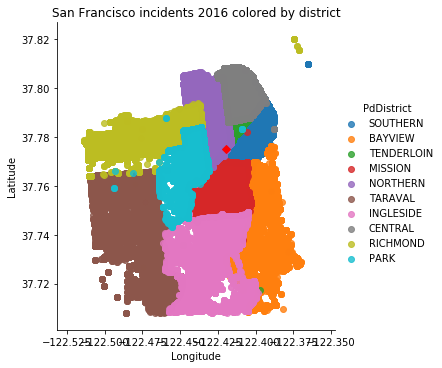

In [21]:
#visualize crime distribution based on Police District

marker_style = dict(color='red', linestyle=':', marker='D',
                    markersize=5)


CRIME = pd.read_csv(r"C:\Users\westc\Desktop\Police_Department_Incidents_-_Previous_Year__2016_.csv")
sns.lmplot('X', 'Y', data=CRIME, hue='PdDistrict', fit_reg=False)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('San Francisco incidents 2016 colored by district')

# place marker at the city center
plt.plot(-122.419416, 37.774929, **marker_style)

plt.show()

In [22]:
# Goal: Create a map to visualize crime in San Francisco based on geolocation
import pandas as pd
import folium

police_file = (r"https://raw.githubusercontent.com/eduardogch/KSU-Practical-Data-Analytics/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")
sf_input = pd.read_csv(police_file, index_col=0)

# group by neighborhood
sf = sf_input.groupby('PdDistrict').count()
sf = pd.DataFrame(sf,columns=['Category'])  # remove unneeded columns
sf.reset_index(inplace=True)   # default index, otherwise groupby column becomes index
sf.rename(columns={'PdDistrict':'Neighborhood','Category':'Count'}, inplace=True)
sf.sort_values(by='Count', inplace=True, ascending=False)

# San Francisco latitude and longitude values
latitude = 37.7749
longitude = -122.4194
sf_neighborhood_geo = r'https://raw.githubusercontent.com/eduardogch/KSU-Practical-Data-Analytics/master/san-francisco.geojson'

# Create map
sf_map = folium.Map(
       location=[latitude,longitude],
       zoom_start=12)

# Use json file  TEST based on class
sf_map.choropleth(
       geo_data=sf_neighborhood_geo,
       data=sf,
       columns=['Neighborhood','Count'],
       key_on='feature.properties.DISTRICT',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.2',
       legend_name='Crime Rate in San Francisco, by Neighborhood')

# display the map
sf_map

C:\Users\westc\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [23]:
#drop all items with locations outside of San Francisco (latitude above 38) to remove outliers
CRIME = CRIME[CRIME.Y < 38]

In [24]:
# print the different categories
print('Categories :',CRIME.Category.unique())

CRIME.set_index('Category', inplace = True)
# print the description of OTHER OFFENSES crimes 
print('Other offenses :',CRIME.loc['OTHER OFFENSES'].Descript.unique())

# delete OTHER OFFENSES crimes - most of the offenses in this category are not 'criminal acts' against others
CRIME.drop('OTHER OFFENSES', inplace=True)
CRIME.reset_index(inplace = True)

Categories : ['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'OTHER OFFENSES'
 'MISSING PERSON' 'LARCENY/THEFT' 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY'
 'FRAUD' 'DRUG/NARCOTIC' 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM'
 'ARSON' 'PROSTITUTION' 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS'
 'TRESPASS' 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE'
 'RUNAWAY' 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']
Other offenses : ['PAROLE VIOLATION' 'RESISTING ARREST' 'PROBATION VIOLATION'
 'VIOLATION OF STAY AWAY ORDER' 'LOST/STOLEN LICENSE PLATE'
 'TRAFFIC VIOLATION ARREST' 'VIOLATION OF RESTRAINING ORDER'
 'DRIVERS LICENSE, SUSPENDED OR REVOKED' 'INDECENT EXPOSURE'
 'TRAFFIC VIOLATION' 'FALSE PERSONATION'
 'FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY'
 'INTERFERRING WITH A PO

In [25]:
# print the different categories
print('Categories :',CRIME.Category.unique())

Categories : ['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'MISSING PERSON'
 'LARCENY/THEFT' 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY' 'FRAUD'
 'DRUG/NARCOTIC' 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM' 'ARSON'
 'PROSTITUTION' 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS'
 'TRESPASS' 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE'
 'RUNAWAY' 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']


In [26]:
# print the different categories
print('Categories :',CRIME.Category.unique())

CRIME.set_index('Category', inplace = True)
# print the description of OTHER OFFENSES crimes to determine relevance
print('Non criminal :',CRIME.loc['NON-CRIMINAL'].Descript.unique())

Categories : ['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'MISSING PERSON'
 'LARCENY/THEFT' 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY' 'FRAUD'
 'DRUG/NARCOTIC' 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM' 'ARSON'
 'PROSTITUTION' 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS'
 'TRESPASS' 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE'
 'RUNAWAY' 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']
Non criminal : ['LOST PROPERTY' 'FIRE REPORT' 'AIDED CASE, MENTAL DISTURBED' 'AIDED CASE'
 'DEATH REPORT, NATURAL CAUSES' 'TARASOFF REPORT'
 'PROPERTY FOR IDENTIFICATION' 'DEATH REPORT, CAUSE UNKNOWN'
 'LICENSE PLATE, RECOVERED' 'SEARCH WARRANT SERVICE' 'FOUND PROPERTY'
 'IMPOUNDED VEHICLE' 'STAY AWAY OR COURT ORDER, NON-DV RELATED'
 'CASE CLOSURE' 'CIVIL SIDEWALKS, CITATION' 'CIVIL SIDEWALKS, WA

In [27]:
# delete Non-Criminal offenses these are more consistent with reports
CRIME.drop('NON-CRIMINAL', inplace=True)
CRIME.reset_index(inplace = True)

In [28]:
# show updated categories of crimes 
print('Categories :',CRIME.Category.unique())

Categories : ['WEAPON LAWS' 'WARRANTS' 'ASSAULT' 'MISSING PERSON' 'LARCENY/THEFT'
 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY' 'FRAUD' 'DRUG/NARCOTIC'
 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM' 'ARSON' 'PROSTITUTION'
 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS' 'TRESPASS'
 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE' 'RUNAWAY'
 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']


In [29]:
CRIME.set_index('Category', inplace = True)
# print the description of TREA crimes 
print('Trea :',CRIME.loc['TREA'].Descript.unique())

# delete TREA crimes
CRIME.drop('TREA', inplace=True)
CRIME.reset_index(inplace = True)

# print final categories of crimes - target attribute
print('Categories :',CRIME.Category.unique())

Trea : ['TRESPASSING OR LOITERING NEAR POSTED INDUSTRIAL PROPERTY']
Categories : ['WEAPON LAWS' 'WARRANTS' 'ASSAULT' 'MISSING PERSON' 'LARCENY/THEFT'
 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY' 'FRAUD' 'DRUG/NARCOTIC'
 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM' 'ARSON' 'PROSTITUTION'
 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS' 'TRESPASS'
 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE' 'RUNAWAY'
 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'BAD CHECKS'
 'PORNOGRAPHY/OBSCENE MAT']


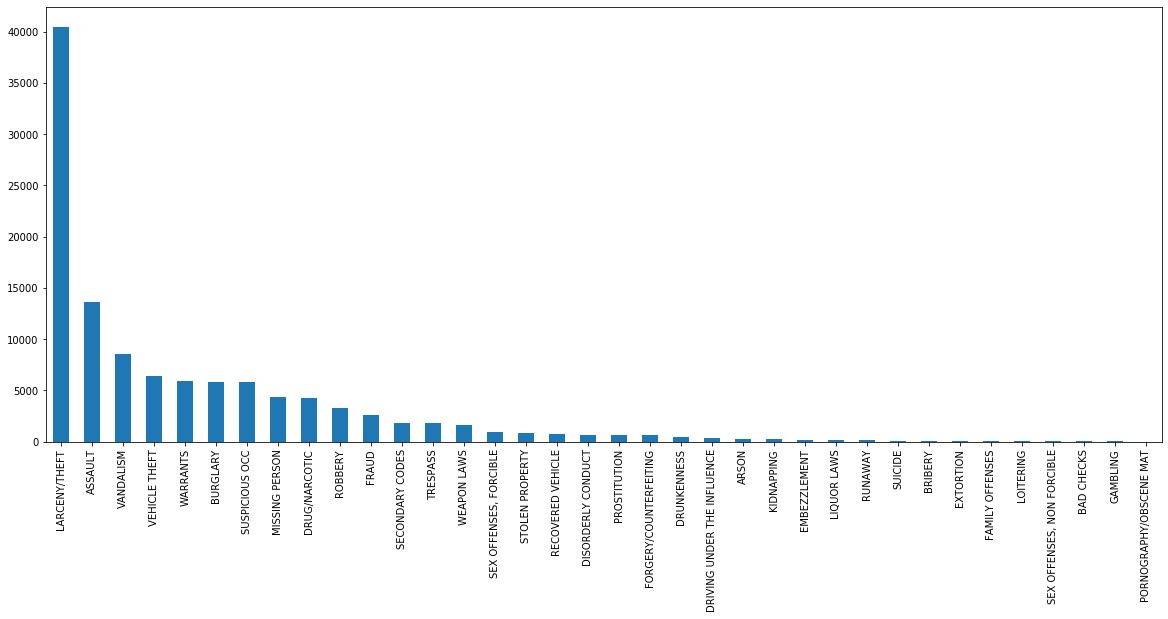

LARCENY/THEFT                  40409
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
LIQUOR LAWS                      156
RUNAWAY                          140
S

In [30]:
# Plot new counts of crime categories
pd.value_counts(CRIME['Category']).plot(kind="bar", figsize = (20, 8))
plt.show()
print(CRIME['Category'].value_counts())

In [40]:
print('Columns :',CRIME.columns)
print('Indexes :',CRIME.index)

print('Column types :',CRIME.dtypes)

Columns : Index(['Category', 'IncidntNum', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')
Indexes : RangeIndex(start=0, stop=113032, step=1)
Column types : Category       object
IncidntNum      int64
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId          float64
dtype: object


# Preprocessing categorical attributes

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [43]:
CRIME = MultiColumnLabelEncoder(columns = ["PdDistrict", "DayOfWeek", "Category"]).fit_transform(CRIME)

In [44]:
print('Columns :',CRIME.columns)
print('Indexes :',CRIME.index)

print('Column types :',CRIME.dtypes)

Columns : Index(['Category', 'IncidntNum', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Hour'],
      dtype='object')
Indexes : Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            113022, 113023, 113024, 113025, 113026, 113027, 113028, 113029,
            113030, 113031],
           dtype='int64', length=113017)
Column types : Category               int32
IncidntNum             int64
Descript              object
DayOfWeek              int32
Date          datetime64[ns]
Time          datetime64[ns]
PdDistrict             int32
Resolution            object
Address               object
X                    float64
Y                    float64
Location              object
PdId                 float64
Hour                   int64
dtype: object


# Train/Test models

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier #import Random Forest Classifier
from sklearn.model_selection import GridSearchCV #import Grid Search
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA #import PCA for model selection
from sklearn.preprocessing import StandardScaler #import Standard Scaler for model selection
from sklearn.neighbors import KNeighborsClassifier #import KNN Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
#split dataset in features and target variable
feature_cols = ['X', 'Y', 'PdDistrict', 'Hour']
X = CRIME[feature_cols] # Features
y = CRIME.Category # Target variable

In [92]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='entropy', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [49]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
1,Y,0.465542
3,Hour,0.235296
0,X,0.195224
2,PdDistrict,0.103938


In [50]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[16 16 16 ... 16 16  1]


In [51]:

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='gini', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

In [94]:
cross_val_score(treeclf, X_train, y_train, cv=3, scoring="accuracy")

array([0.36470454, 0.36303993, 0.36716112])

# K-Nearest Neighbors (KNN)

In [53]:
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=2,
                     weights='uniform')

In [54]:
y_pred = knn.predict(X_test)

In [95]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.36443922, 0.36398802, 0.36484692])

# Random Forest Classifier

In [58]:
rfc = RandomForestClassifier(criterion='gini',
                             min_samples_split=500,
                            n_estimators=10,
                            n_jobs=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rfc.predict(X_test)
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.36443922, 0.36398802, 0.36484692])

In [97]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [98]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
35.95%



In [62]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [63]:
#split dataset in features and target variable
feature_cols = ['X', 'Y', 'PdDistrict', 'DayOfWeek']
X = CRIME[feature_cols] # Features
y = CRIME.Category # Target variable

In [64]:
# Converting into dummy features for scikit-learn
# X = pd.get_dummies(X, prefix='is_') 
# Fill Nan with 0
X = X.fillna(0)
# Gather column names
feature_names = list(X)
target_names = list(y)


In [65]:
# Separate data into training and testing datasets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [66]:
# Parameters to be tested
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[None, 2, 3]}
# Use grid search with 3 K-Fold to find the best parameters
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=3, random_state=seed)
# Comparison
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=kfold, scoring=scoring)
clf.fit(X_train, y_train)
print("Best estimator: ", clf.best_estimator_)

Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [67]:
# Train with the best parameters
dt = clf.best_estimator_
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.36654128, 0.36462337, 0.36664156])

In [68]:
importances = dt.feature_importances_
std = np.std([importances],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

importance_to_plot = []
for f in range(X.shape[1]):
    if(importances[indices[f]]):
        importance_to_plot.append(importances[indices[f]])
        print("%d. feature %s (%f)" % (f + 1, feature_names[f], importances[indices[f]]))

Feature ranking:
1. feature X (0.622511)
2. feature Y (0.208212)
3. feature PdDistrict (0.169277)


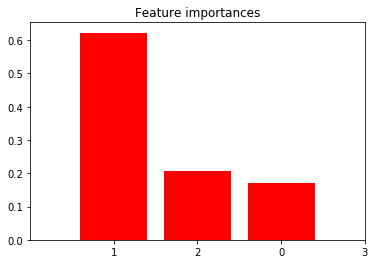

In [69]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, len(importance_to_plot)])
plt.show()

In [99]:
#split dataset in features and target variable
feature_cols = ['X', 'Y', 'Hour']
X = CRIME[feature_cols] # Features
y = CRIME.Category # Target variable

In [100]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.34071182, 0.34240965, 0.34610569])

In [103]:
# Separate data into training and testing datasets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [104]:
# Parameters to be tested
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[None, 2, 3]}
# Use grid search with 3 K-Fold to find the best parameters
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=3, random_state=seed)
# Comparison
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=kfold, scoring=scoring)
clf.fit(X_train, y_train)
print("Best estimator: ", clf.best_estimator_)

Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [105]:

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='entropy', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [106]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[16  1 16 ... 16 16 16]


In [107]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
1,Y,0.495777
0,X,0.264694
2,Hour,0.239529


In [108]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.36654128, 0.36462337, 0.36664156])

In [109]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
35.05%

